In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay

In [2]:
happiness = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

## Univariate Analysis

In [4]:
happiness.Country.value_counts()

Country
Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: count, Length: 158, dtype: int64

In [5]:
happiness.duplicated().sum()

0

In [6]:
round(happiness.Region.value_counts(normalize=True)*100,1)

Region
Sub-Saharan Africa                 25.3
Central and Eastern Europe         18.4
Latin America and Caribbean        13.9
Western Europe                     13.3
Middle East and Northern Africa    12.7
Southeastern Asia                   5.7
Southern Asia                       4.4
Eastern Asia                        3.8
North America                       1.3
Australia and New Zealand           1.3
Name: proportion, dtype: float64

In [7]:
numerical_features = happiness.select_dtypes(include=np.number)
numerical_features.drop(['Happiness Rank','Standard Error','Dystopia Residual'],axis=1,inplace=True)
numerical_features.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


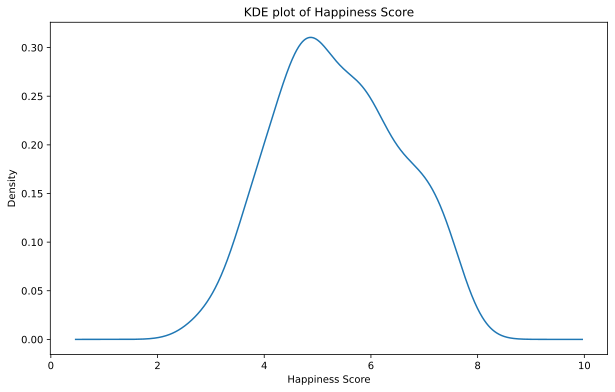

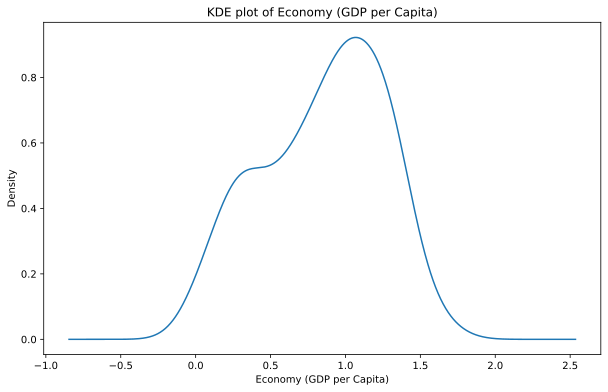

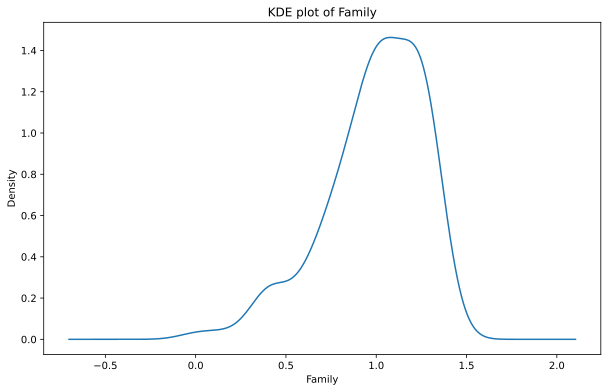

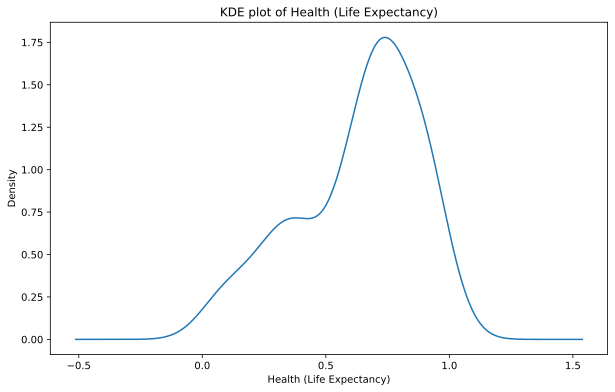

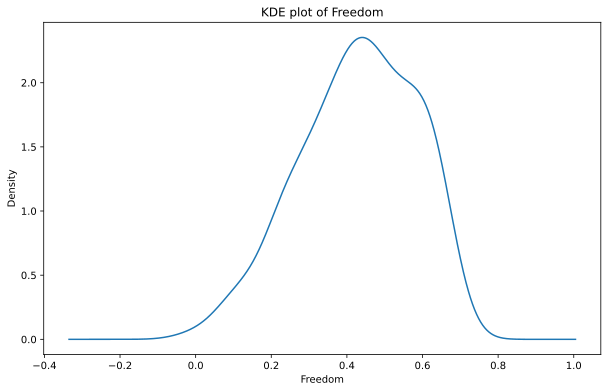

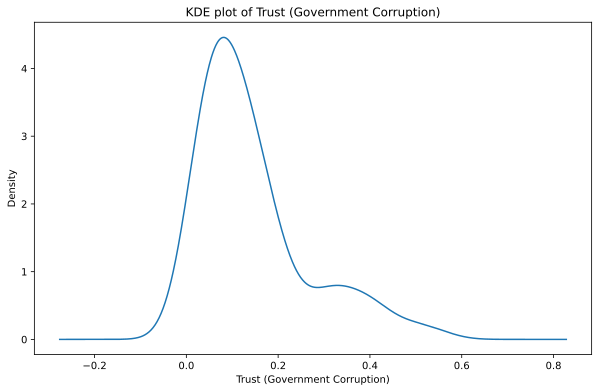

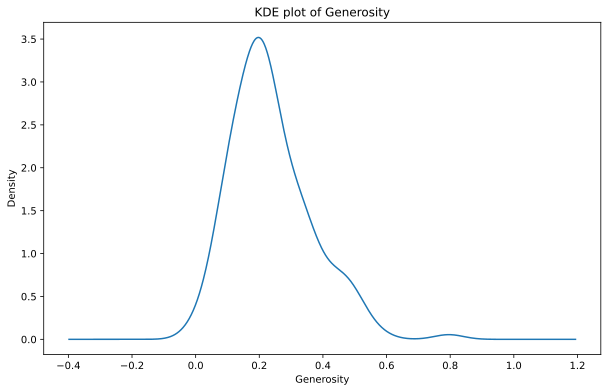

In [8]:
for col in numerical_features.columns:
    plt.figure(figsize=(10,6))
    numerical_features[col].plot.kde()
    plt.xlabel(col)
    plt.title(f'KDE plot of {col}')
    plt.show()

In [9]:
numerical_features.skew().reset_index().rename(columns={'index':'Columns',0:'Skewness'})

,Columns,Skewness
0,Happiness Score,0.097769
1,Economy (GDP per Capita),-0.317575
2,Family,-1.006893
3,Health (Life Expectancy),-0.705328
4,Freedom,-0.413462
5,Trust (Government Corruption),1.385463
6,Generosity,1.001961


In [10]:
numerical_features.kurt().reset_index().rename(columns={'index':'Columns',0:'Kurtosis'})

,Columns,Kurtosis
0,Happiness Score,-0.776075
1,Economy (GDP per Capita),-0.866986
2,Family,0.918819
3,Health (Life Expectancy),-0.393935
4,Freedom,-0.460778
5,Trust (Government Corruption),1.384787
6,Generosity,1.746528


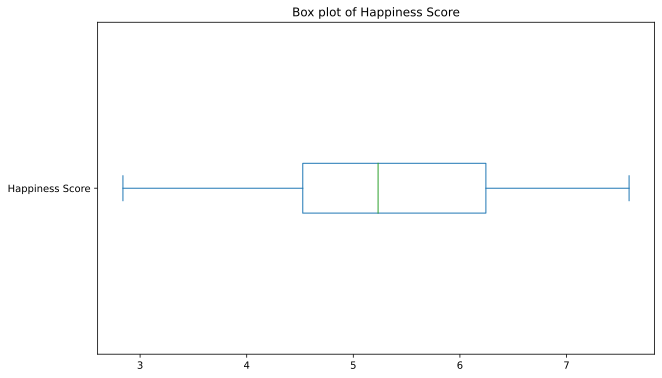

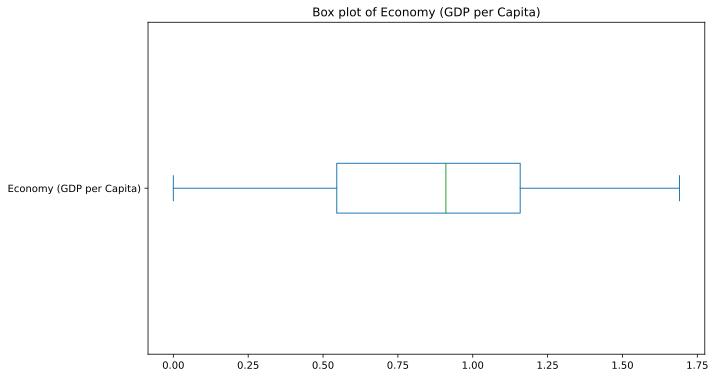

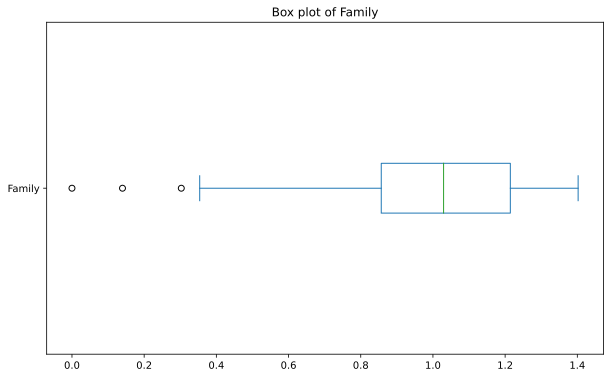

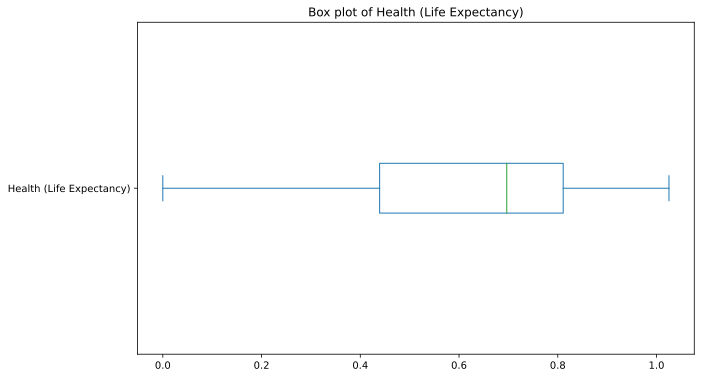

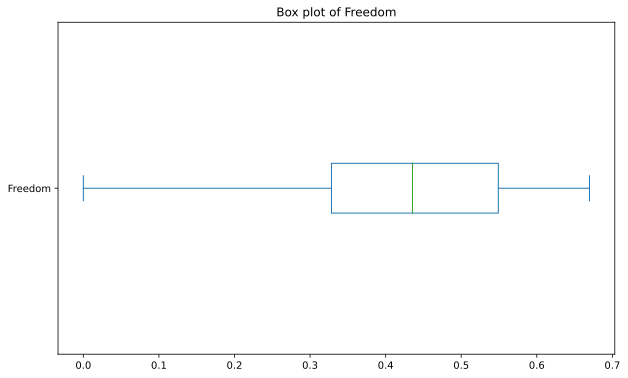

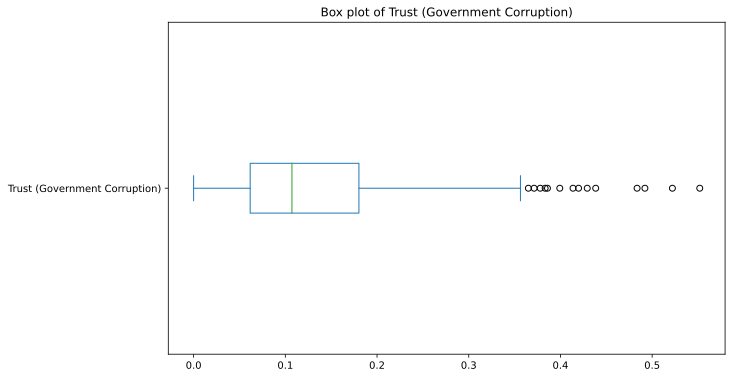

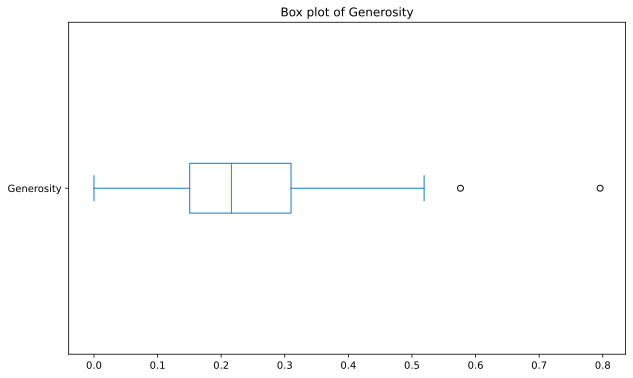

In [11]:
for col in numerical_features.columns:
    plt.figure(figsize=(10,6))
    numerical_features[col].plot.box(vert=False)
    plt.title(f'Box plot of {col}')
    plt.ylabel('')
    plt.show()

## Bivariate Analysis

### Between features

In [12]:
numerical_features.drop(['Happiness Score'],axis=1).corr()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Economy (GDP per Capita),1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465
Family,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513
Health (Life Expectancy),0.816478,0.531104,1.000000,0.360477,0.248335,0.108335
Freedom,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916
Trust (Government Corruption),0.307885,0.205605,0.248335,0.493524,1.000000,0.276123
Generosity,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000


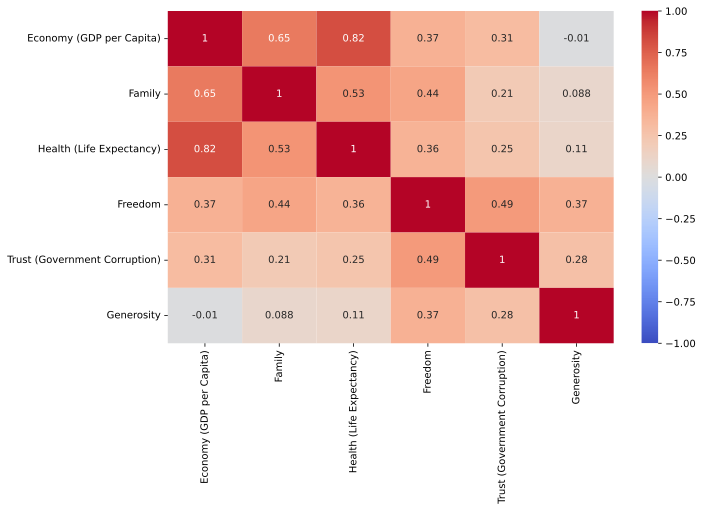

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(numerical_features.drop(['Happiness Score'],axis=1).corr(),annot=True,cmap='coolwarm',vmax=1,vmin=-1);

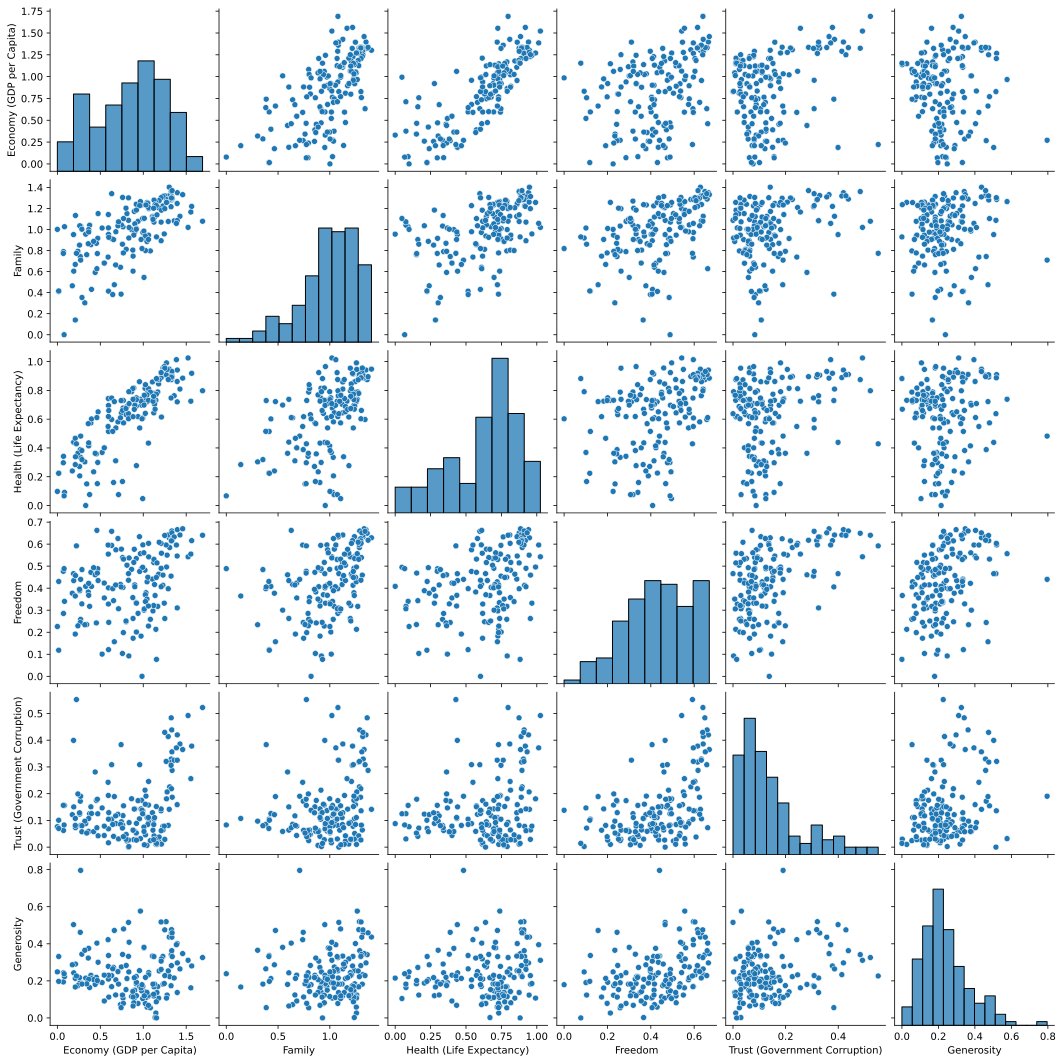

In [14]:
sns.pairplot(numerical_features.drop(['Happiness Score'],axis=1))
plt.show();

In [15]:
def get_VIFs(features):
    vifs=pd.Series()
    for i,col in enumerate(features.columns.values):
        vif=variance_inflation_factor(exog=features,exog_idx=i)
        vifs[col]=vif
    return vifs.sort_values(ascending=False)

get_VIFs(numerical_features.drop(['Happiness Score'],axis=1))

Health (Life Expectancy)         22.342857
Economy (GDP per Capita)         21.016604
Family                           18.671410
Freedom                          15.283001
Generosity                        5.516486
Trust (Government Corruption)     3.454425
dtype: float64

## Feature selection

In [16]:
selected_features=numerical_features.drop(['Happiness Score'],axis=1).copy()
get_VIFs(selected_features)

Health (Life Expectancy)         22.342857
Economy (GDP per Capita)         21.016604
Family                           18.671410
Freedom                          15.283001
Generosity                        5.516486
Trust (Government Corruption)     3.454425
dtype: float64

In [17]:
selected_features.drop(['Economy (GDP per Capita)'],axis=1,inplace=True)
get_VIFs(selected_features)

Family                           16.189925
Freedom                          15.248674
Health (Life Expectancy)         10.757263
Generosity                        4.978333
Trust (Government Corruption)     3.272357
dtype: float64

In [18]:
selected_features.drop(['Family'],axis=1,inplace=True)
get_VIFs(selected_features)

Freedom                          11.232852
Health (Life Expectancy)          6.785286
Generosity                        4.950014
Trust (Government Corruption)     3.227974
dtype: float64

In [19]:
selected_features.drop(['Freedom'],axis=1,inplace=True)
get_VIFs(selected_features)

Health (Life Expectancy)         3.985463
Generosity                       3.809061
Trust (Government Corruption)    2.775394
dtype: float64

In [20]:
selected_features.corr()

,Health (Life Expectancy),Trust (Government Corruption),Generosity
Health (Life Expectancy),1.000000,0.248335,0.108335
Trust (Government Corruption),0.248335,1.000000,0.276123
Generosity,0.108335,0.276123,1.000000


In [21]:
feature_by_region=pd.concat([happiness.Region,selected_features],axis=1)
feature_by_region

,Region,Health (Life Expectancy),Trust (Government Corruption),Generosity
0,Western Europe,0.94143,0.41978,0.29678
1,Western Europe,0.94784,0.14145,0.43630
2,Western Europe,0.87464,0.48357,0.34139
3,Western Europe,0.88521,0.36503,0.34699
4,North America,0.90563,0.32957,0.45811
...,...,...,...,...
153,Sub-Saharan Africa,0.42864,0.55191,0.22628
154,Sub-Saharan Africa,0.31910,0.08010,0.18260
155,Middle East and Northern Africa,0.72193,0.18906,0.47179
156,Sub-Saharan Africa,0.22396,0.10062,0.19727


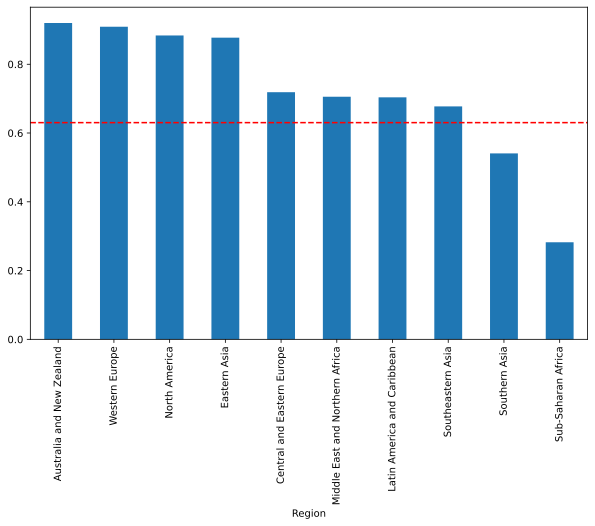

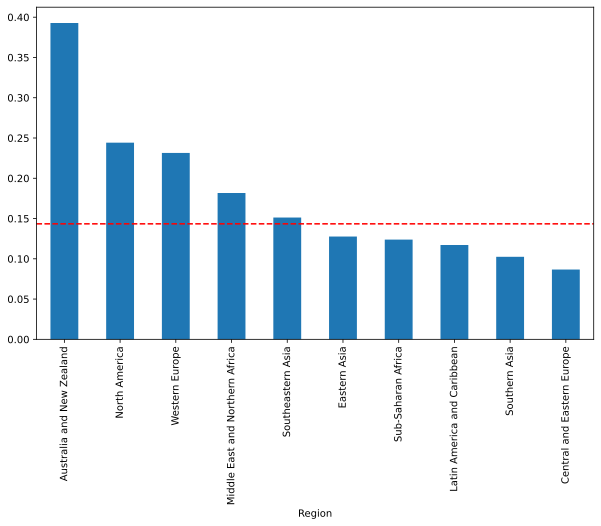

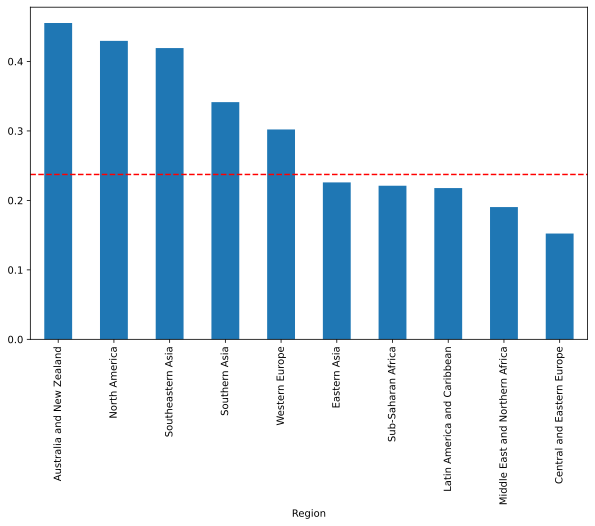

In [22]:
for col in selected_features.columns.values:
    feature_by_region.groupby('Region')[col].mean().sort_values(ascending=False).plot.bar(figsize=(10,6))
    plt.axhline(feature_by_region[col].mean(),color='red',linestyle='--')
    plt.show()

### Between target and features

In [23]:
target_with_features=pd.concat([selected_features,happiness['Happiness Score']],axis=1)
target_with_features.head()

,Health (Life Expectancy),Trust (Government Corruption),Generosity,Happiness Score
0,0.94143,0.41978,0.29678,7.587
1,0.94784,0.14145,0.43630,7.561
2,0.87464,0.48357,0.34139,7.527
3,0.88521,0.36503,0.34699,7.522
4,0.90563,0.32957,0.45811,7.427


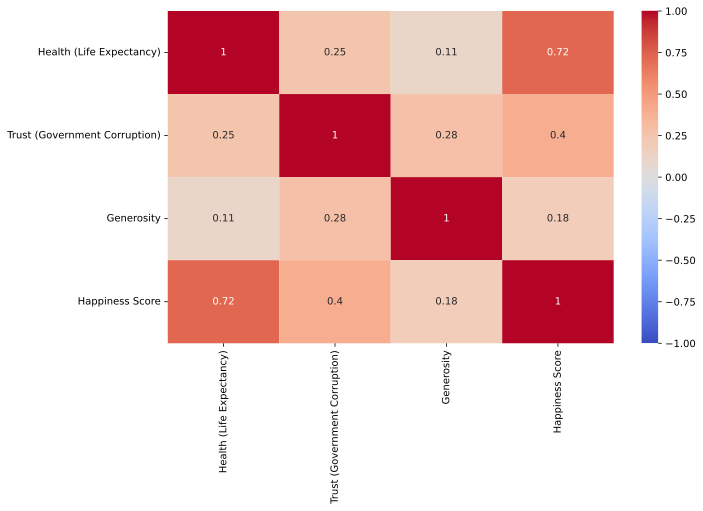

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(target_with_features.corr(),cmap='coolwarm',annot=True,vmin=-1,vmax=1);

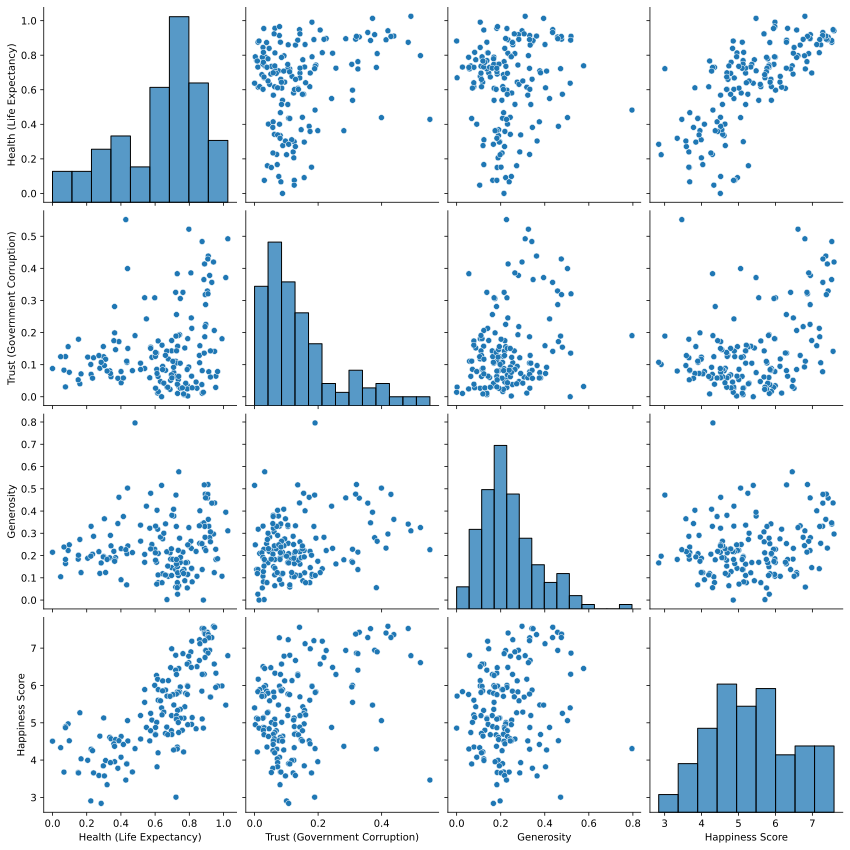

In [25]:
sns.pairplot(target_with_features,height=3);

## Feature engineering

In [26]:
X,y=target_with_features.drop(['Happiness Score'],axis=1),target_with_features['Happiness Score']

In [27]:
scaler=MinMaxScaler()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Model building

In [28]:
def score_model(model,X,y,X_test,y_test,random_state=42):
    score_dict={}
    cv=KFold(n_splits=10,
             shuffle=True,
             random_state=random_state)
    cv_score=cross_val_score(estimator=model,
                    X=X,
                    y=y,
                    cv=cv,
                    scoring='neg_mean_absolute_error',
                    n_jobs=50).mean()*-1
    test_score=mean_absolute_error(y_pred=model.fit(X,y).predict(X_test),
                                   y_true=y_test)
    score_dict['cv_score']=cv_score
    score_dict['test_score']=test_score
    score_dict['score_diff']=abs(cv_score-test_score)
    return score_dict

In [29]:
fit_dict={}
for rs in range(1,1001):
    model=RandomForestRegressor(random_state=rs)
    score_dict=score_model(model=model,
                X=X_train_scaled,
                y=y_train,
                X_test=X_test_scaled,
                y_test=y_test,
                random_state=rs)
    test_score=mean_absolute_error(y_pred=model.fit(X_train_scaled,y_train).predict(X_test_scaled),
                                   y_true=y_test)
    fit_dict[rs]=score_dict

key_fn=lambda x:fit_dict[x]['score_diff']
best_rs=min(fit_dict,key=key_fn)
best_rs

686

### Selecting the best ML algorithm

In [39]:
ml_algo_scores={}

In [40]:
# Linear Regression
lr=LinearRegression()
model_score=score_model(model=lr,
                        X=X_train_scaled,
                        y=y_train,
                        X_test=X_test_scaled,
                        y_test=y_test,
                        random_state=best_rs)
ml_algo_scores[lr]=model_score['score_diff']
model_score

{'cv_score': 0.5835169582552883,
 'test_score': 0.710678311801774,
 'score_diff': 0.12716135354648572}

In [41]:
# ElasticNet
el=ElasticNet(random_state=best_rs)
model_score=score_model(model=el,
                        X=X_train_scaled,
                        y=y_train,
                        X_test=X_test_scaled,
                        y_test=y_test,
                        random_state=best_rs)
ml_algo_scores[el]=model_score['score_diff']
model_score

{'cv_score': 0.9494441757331838,
 'test_score': 1.028967757936508,
 'score_diff': 0.07952358220332412}

In [42]:
# Ridge regression
ridge=Ridge(random_state=best_rs)
model_score=score_model(model=ridge,
                        X=X_train_scaled,
                        y=y_train,
                        X_test=X_test_scaled,
                        y_test=y_test,
                        random_state=best_rs)
ml_algo_scores[ridge]=model_score['score_diff']
model_score

{'cv_score': 0.5913129553631208,
 'test_score': 0.7270385581048981,
 'score_diff': 0.13572560274177736}

In [43]:
# Lasso regression
lasso=Lasso(random_state=best_rs)
model_score=score_model(model=lasso,
                        X=X_train_scaled,
                        y=y_train,
                        X_test=X_test_scaled,
                        y_test=y_test,
                        random_state=best_rs)
ml_algo_scores[lasso]=model_score['score_diff']
model_score

{'cv_score': 0.9494441757331838,
 'test_score': 1.028967757936508,
 'score_diff': 0.07952358220332412}

In [44]:
# Random Forest Regressor
rf=RandomForestRegressor(random_state=best_rs)
model_score=score_model(model=rf,
                        X=X_train_scaled,
                        y=y_train,
                        X_test=X_test_scaled,
                        y_test=y_test,
                        random_state=best_rs)
ml_algo_scores[rf]=model_score['score_diff']
model_score

{'cv_score': 0.5640958076923079,
 'test_score': 0.5653321875000001,
 'score_diff': 0.0012363798076922006}

In [45]:
# Gradient Boosting Regressor
gb=GradientBoostingRegressor(random_state=best_rs)
model_score=score_model(model=gb,
                        X=X_train_scaled,
                        y=y_train,
                        X_test=X_test_scaled,
                        y_test=y_test,
                        random_state=best_rs)
ml_algo_scores[gb]=model_score['score_diff']
model_score

{'cv_score': 0.6094406627159472,
 'test_score': 0.584433921470122,
 'score_diff': 0.025006741245825248}

### As the dataset is small, we will not go for hyperparameter tuning. Instead, we will use the best model from the above list which is the random forest regressor.

In [46]:
ml_algo_scores

{LinearRegression(): 0.12716135354648572,
 ElasticNet(random_state=686): 0.07952358220332412,
 Ridge(random_state=686): 0.13572560274177736,
 Lasso(random_state=686): 0.07952358220332412,
 RandomForestRegressor(random_state=686): 0.0012363798076922006,
 GradientBoostingRegressor(random_state=686): 0.025006741245825248}

In [48]:
selected_model=min(ml_algo_scores,key=ml_algo_scores.get)

## Feature importance

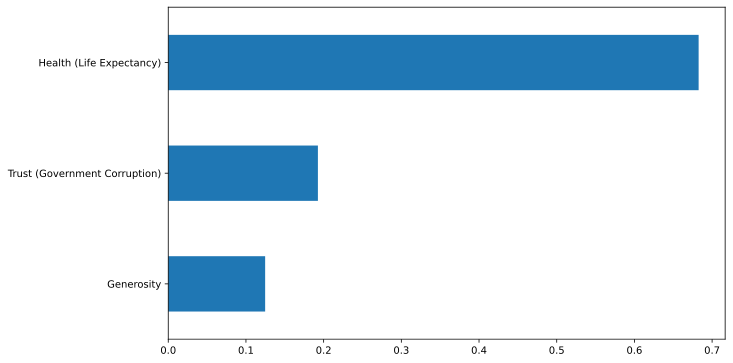

In [52]:
feature_importance=pd.Series(index=X.columns.values,data=selected_model.feature_importances_)
feature_importance.sort_values(ascending=True).plot.barh(figsize=(10,6));

## Partial dependence plots

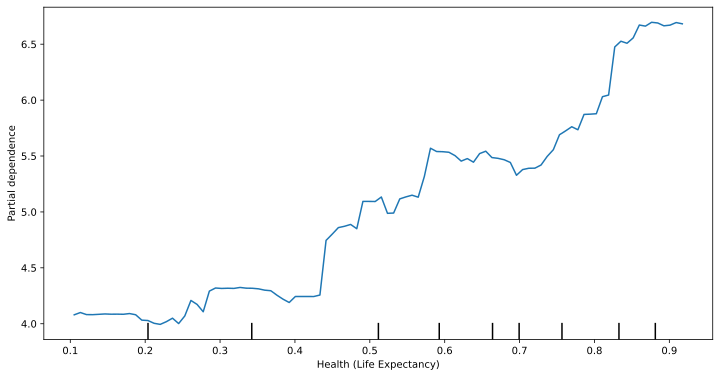

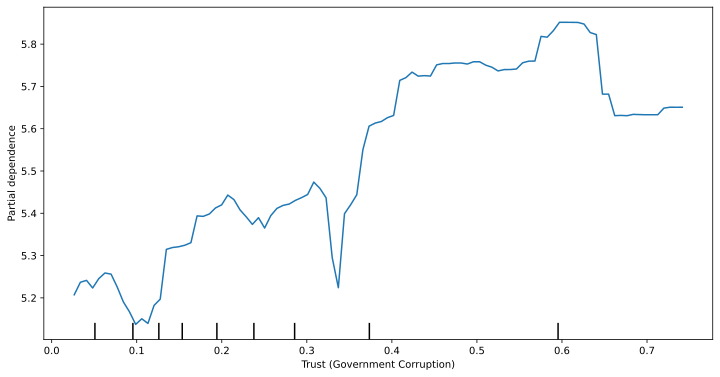

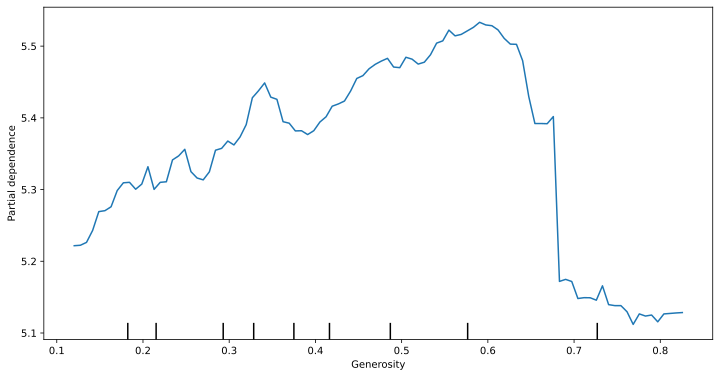

In [60]:
pred_df=pd.DataFrame(columns=X.columns.values,
                    data=scaler.transform(X))
for col in pred_df.columns.values:
    fig, ax = plt.subplots(figsize=(12, 6))
    PartialDependenceDisplay.from_estimator(estimator=selected_model,
                                            X=pred_df,
                                            features=[col],
                                            ax=ax)
    plt.show()

In [62]:
predicted_y=selected_model.predict(scaler.transform(X))
happiness['Predicted Happiness']=predicted_y

In [63]:
happiness

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Predicted Happiness
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.36790
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.14841
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.35007
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.38627
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.33807
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.83525
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.66743
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.91825
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,4.00354


## Alternative model keeping all features even though they depict high VIFs

In [64]:
numerical_features.drop(['Happiness Score'],axis=1)

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [66]:
X,y=numerical_features.drop(['Happiness Score'],axis=1),numerical_features['Happiness Score']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [67]:
fit_dict={}
for rs in range(1,1001):
    model=RandomForestRegressor(random_state=rs)
    score_dict=score_model(model=model,
                X=X_train_scaled,
                y=y_train,
                X_test=X_test_scaled,
                y_test=y_test,
                random_state=rs)
    test_score=mean_absolute_error(y_pred=model.fit(X_train_scaled,y_train).predict(X_test_scaled),
                                   y_true=y_test)
    fit_dict[rs]=score_dict

key_fn=lambda x:fit_dict[x]['score_diff']
best_rs=min(fit_dict,key=key_fn)
best_rs

441

In [68]:
ml_algo_scores={}
# Linear Regression
lr=LinearRegression()
model_score=score_model(model=lr,
                        X=X_train_scaled,
                        y=y_train,
                        X_test=X_test_scaled,
                        y_test=y_test,
                        random_state=best_rs)
ml_algo_scores[lr]=model_score['score_diff']
model_score


{'cv_score': 0.4492424578572849,
 'test_score': 0.40230498538143983,
 'score_diff': 0.046937472475845066}

In [69]:
# ElasticNet
el=ElasticNet(random_state=best_rs)
model_score=score_model(model=el,
                        X=X_train_scaled,
                        y=y_train,
                        X_test=X_test_scaled,
                        y_test=y_test,
                        random_state=best_rs)
ml_algo_scores[el]=model_score['score_diff']
model_score


{'cv_score': 0.9514486855043213,
 'test_score': 1.028967757936508,
 'score_diff': 0.0775190724321867}

In [70]:
# Ridge regression
ridge=Ridge(random_state=best_rs)
model_score=score_model(model=ridge,
                        X=X_train_scaled,
                        y=y_train,
                        X_test=X_test_scaled,
                        y_test=y_test,
                        random_state=best_rs)
ml_algo_scores[ridge]=model_score['score_diff']
model_score


{'cv_score': 0.4522869303278122,
 'test_score': 0.43061446086980343,
 'score_diff': 0.02167246945800877}

In [71]:
# Lasso regression
lasso=Lasso(random_state=best_rs)
model_score=score_model(model=lasso,
                        X=X_train_scaled,
                        y=y_train,
                        X_test=X_test_scaled,
                        y_test=y_test,
                        random_state=best_rs)
ml_algo_scores[lasso]=model_score['score_diff']
model_score


{'cv_score': 0.9514486855043213,
 'test_score': 1.028967757936508,
 'score_diff': 0.0775190724321867}

In [72]:
# Random Forest Regressor
rf=RandomForestRegressor(random_state=best_rs)
model_score=score_model(model=rf,
                        X=X_train_scaled,
                        y=y_train,
                        X_test=X_test_scaled,
                        y_test=y_test,
                        random_state=best_rs)
ml_algo_scores[rf]=model_score['score_diff']
model_score


{'cv_score': 0.4557428910256414,
 'test_score': 0.45576468750000054,
 'score_diff': 2.1796474359125906e-05}

In [73]:
# Gradient Boosting Regressor
gb=GradientBoostingRegressor(random_state=best_rs)
model_score=score_model(model=gb,
                        X=X_train_scaled,
                        y=y_train,
                        X_test=X_test_scaled,
                        y_test=y_test,
                        random_state=best_rs)
ml_algo_scores[gb]=model_score['score_diff']
model_score

{'cv_score': 0.4705885912530047,
 'test_score': 0.4913042746675168,
 'score_diff': 0.02071568341451213}

In [74]:
selected_model=min(ml_algo_scores,key=ml_algo_scores.get)

## Feature importance

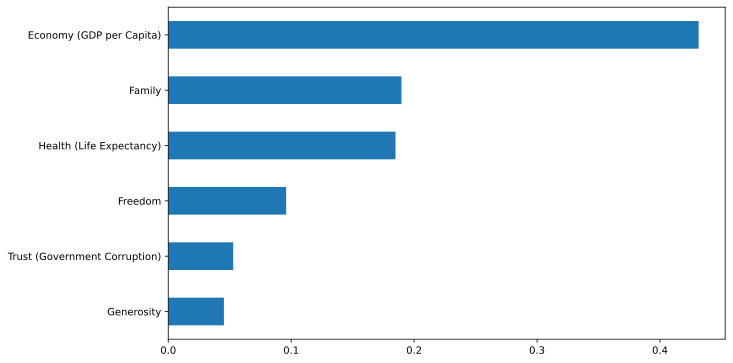

In [75]:
feature_importance=pd.Series(index=X.columns.values,data=selected_model.feature_importances_)
feature_importance.sort_values(ascending=True).plot.barh(figsize=(10,6));

## Partial dependence plots

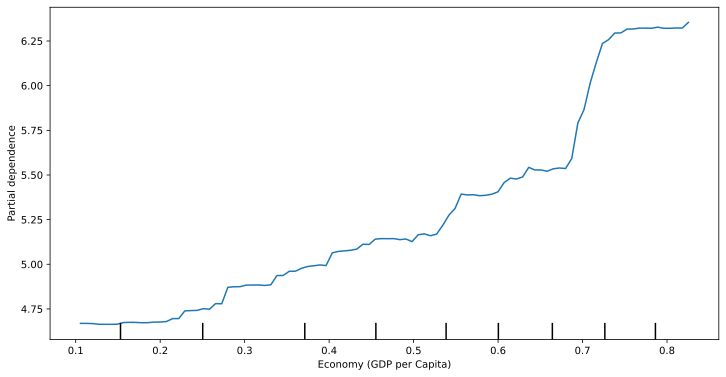

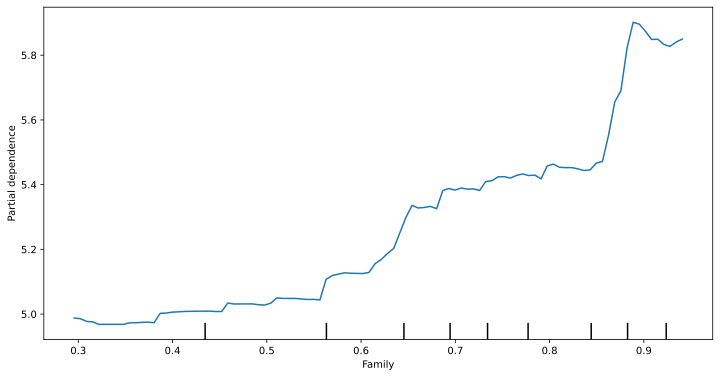

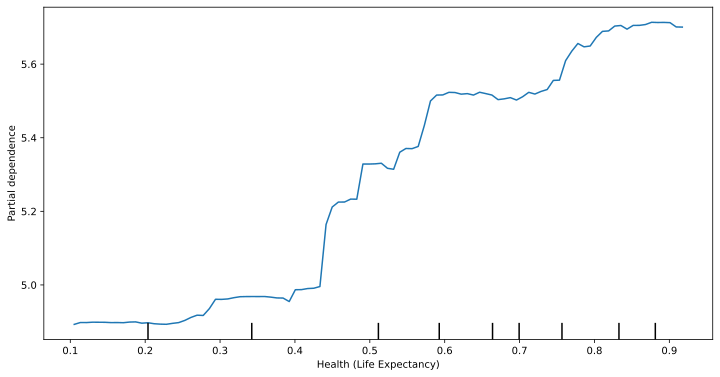

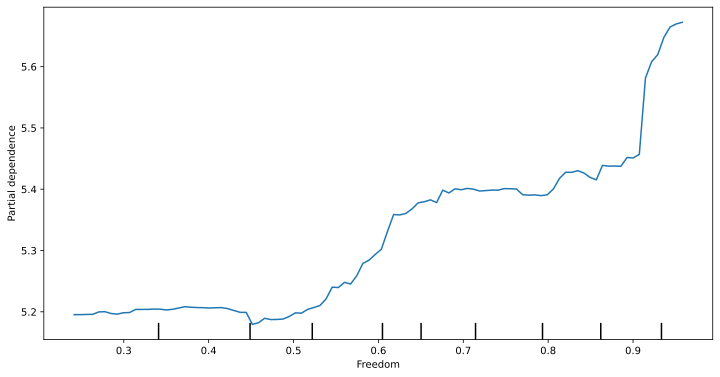

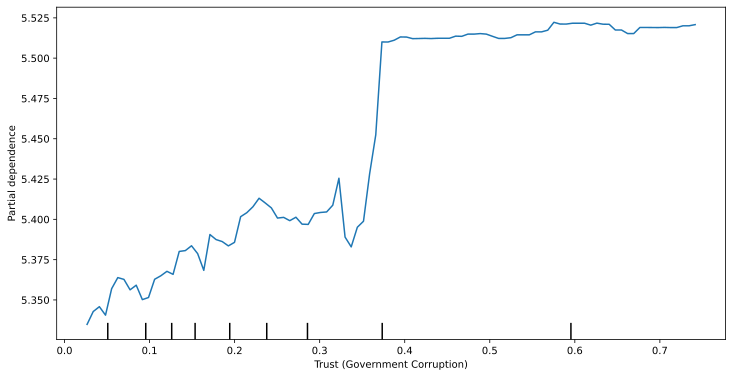

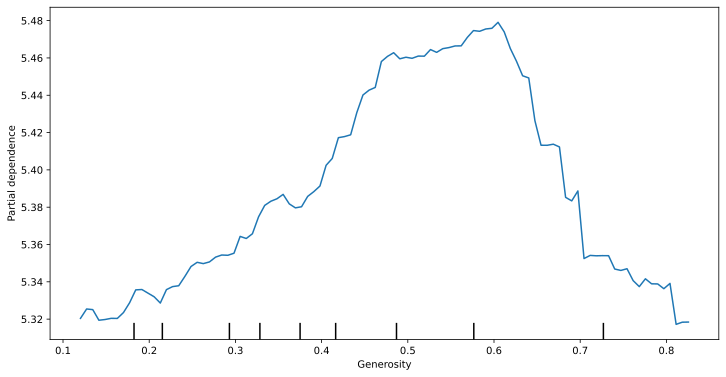

In [76]:
pred_df=pd.DataFrame(columns=X.columns.values,
                    data=scaler.transform(X))
for col in pred_df.columns.values:
    fig, ax = plt.subplots(figsize=(12, 6))
    PartialDependenceDisplay.from_estimator(estimator=selected_model,
                                            X=pred_df,
                                            features=[col],
                                            ax=ax)
    plt.show()

### The feature Generosity has no significant effect; hence we drop it in the final model.

In [87]:
X,y=numerical_features.drop(['Generosity','Happiness Score'],axis=1),numerical_features['Happiness Score']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [88]:
fit_dict={}
for rs in range(1,1001):
    model=RandomForestRegressor(random_state=rs)
    score_dict=score_model(model=model,
                X=X_train_scaled,
                y=y_train,
                X_test=X_test_scaled,
                y_test=y_test,
                random_state=rs)
    test_score=mean_absolute_error(y_pred=model.fit(X_train_scaled,y_train).predict(X_test_scaled),
                                   y_true=y_test)
    fit_dict[rs]=score_dict

key_fn=lambda x:fit_dict[x]['score_diff']
best_rs=min(fit_dict,key=key_fn)
best_rs

263

In [89]:
ml_algo_scores={}
# Linear Regression
lr=LinearRegression()
model_score=score_model(model=lr,
                        X=X_train_scaled,
                        y=y_train,
                        X_test=X_test_scaled,
                        y_test=y_test,
                        random_state=best_rs)
ml_algo_scores[lr]=model_score['score_diff']
model_score


{'cv_score': 0.44684397609971577,
 'test_score': 0.38611187978929695,
 'score_diff': 0.060732096310418815}

In [90]:
# ElasticNet
el=ElasticNet(random_state=best_rs)
model_score=score_model(model=el,
                        X=X_train_scaled,
                        y=y_train,
                        X_test=X_test_scaled,
                        y_test=y_test,
                        random_state=best_rs)
ml_algo_scores[el]=model_score['score_diff']
model_score


{'cv_score': 0.961434945003762,
 'test_score': 1.028967757936508,
 'score_diff': 0.06753281293274593}

In [91]:
# Ridge regression
ridge=Ridge(random_state=best_rs)
model_score=score_model(model=ridge,
                        X=X_train_scaled,
                        y=y_train,
                        X_test=X_test_scaled,
                        y_test=y_test,
                        random_state=best_rs)
ml_algo_scores[ridge]=model_score['score_diff']
model_score


{'cv_score': 0.4495598380819546,
 'test_score': 0.4173141595932446,
 'score_diff': 0.03224567848871002}

In [92]:
# Lasso regression
lasso=Lasso(random_state=best_rs)
model_score=score_model(model=lasso,
                        X=X_train_scaled,
                        y=y_train,
                        X_test=X_test_scaled,
                        y_test=y_test,
                        random_state=best_rs)
ml_algo_scores[lasso]=model_score['score_diff']
model_score


{'cv_score': 0.961434945003762,
 'test_score': 1.028967757936508,
 'score_diff': 0.06753281293274593}

In [93]:
# Random Forest Regressor
rf=RandomForestRegressor(random_state=best_rs)
model_score=score_model(model=rf,
                        X=X_train_scaled,
                        y=y_train,
                        X_test=X_test_scaled,
                        y_test=y_test,
                        random_state=best_rs)
ml_algo_scores[rf]=model_score['score_diff']
model_score


{'cv_score': 0.46365135256410267,
 'test_score': 0.4625518750000004,
 'score_diff': 0.0010994775641022803}

In [94]:
# Gradient Boosting Regressor
gb=GradientBoostingRegressor(random_state=best_rs)
model_score=score_model(model=gb,
                        X=X_train_scaled,
                        y=y_train,
                        X_test=X_test_scaled,
                        y_test=y_test,
                        random_state=best_rs)
ml_algo_scores[gb]=model_score['score_diff']
model_score

{'cv_score': 0.49549856854336893,
 'test_score': 0.4541249749119348,
 'score_diff': 0.041373593631434114}

In [95]:
selected_model=min(ml_algo_scores,key=ml_algo_scores.get)

## Feature importance

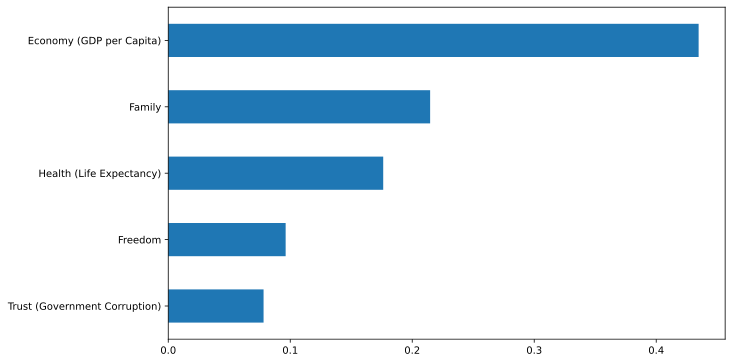

In [96]:
feature_importance=pd.Series(index=X.columns.values,data=selected_model.feature_importances_)
feature_importance.sort_values(ascending=True).plot.barh(figsize=(10,6));

## Partial dependence plots

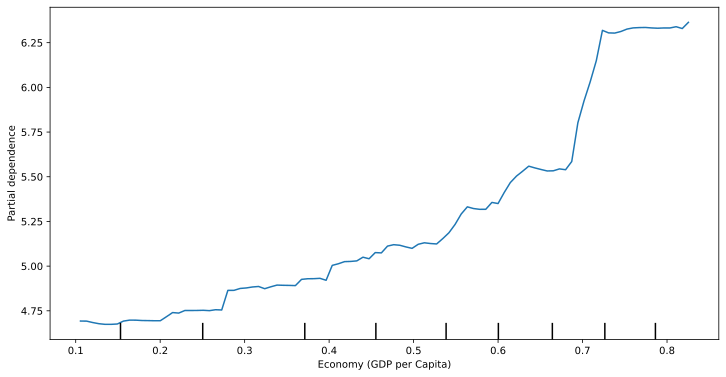

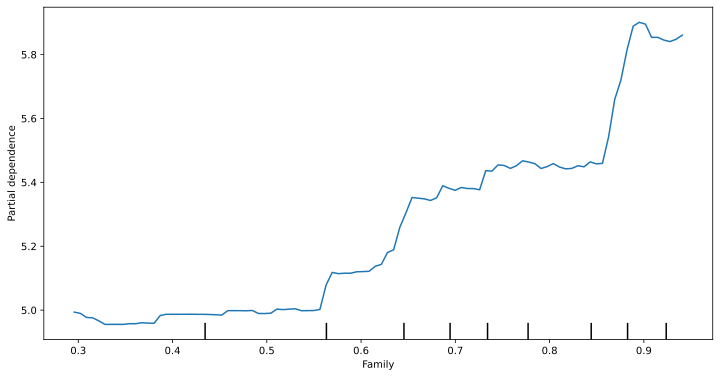

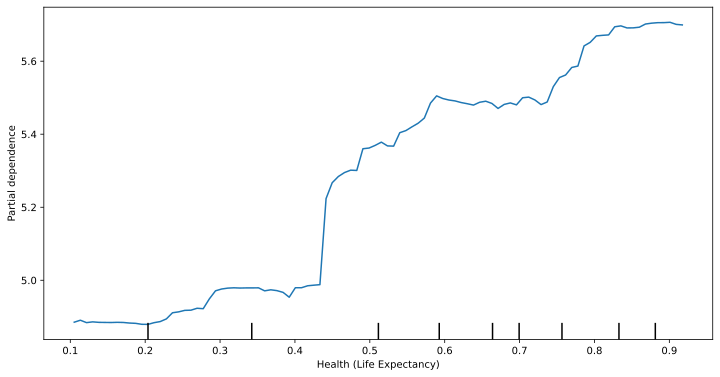

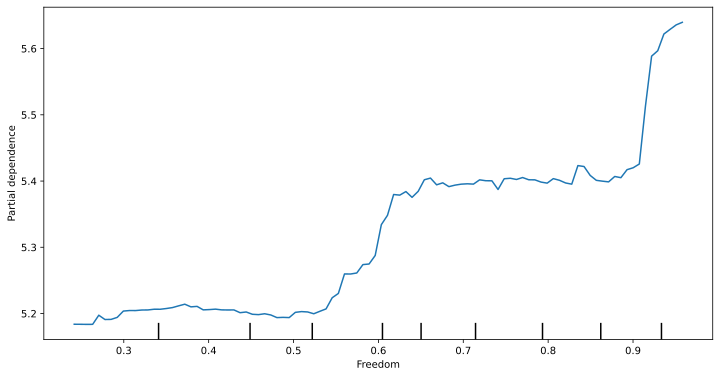

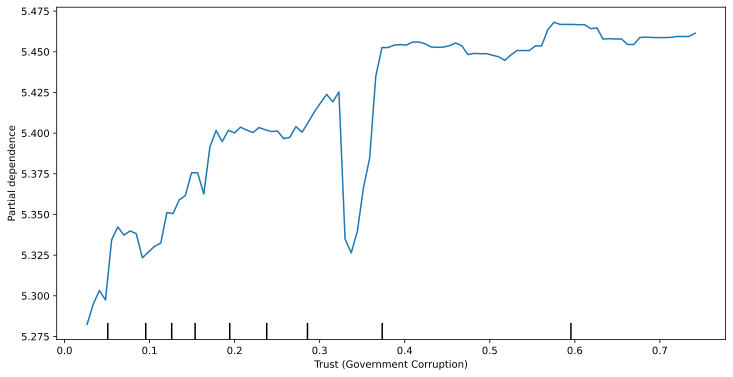

In [97]:
pred_df=pd.DataFrame(columns=X.columns.values,
                    data=scaler.transform(X))
for col in pred_df.columns.values:
    fig, ax = plt.subplots(figsize=(12, 6))
    PartialDependenceDisplay.from_estimator(estimator=selected_model,
                                            X=pred_df,
                                            features=[col],
                                            ax=ax)
    plt.show()